In [107]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

import pandas as pd
import numpy as np
import numpy_financial as npf

# Estimate future value of regular savings

In [108]:
n_years = 5 # years of saving
months = 12 * n_years 
inflation_rate = 0.02 # mean inflation rate p.a.
rate = np.arange(0.01, 0.11, 0.01) # different saving scenarios (low to high yields)
rate_pa = rate / 12 # p.a.
seed_capital = 30000 # start capital
rate_monthly = 500 # monthly savings

benchmark = np.array([seed_capital + rate_monthly*months]*len(rate_pa)) * (1-inflation_rate)**n_years
savings = npf.fv(rate_pa, months, -rate_monthly, -seed_capital) * (1-inflation_rate)**n_years

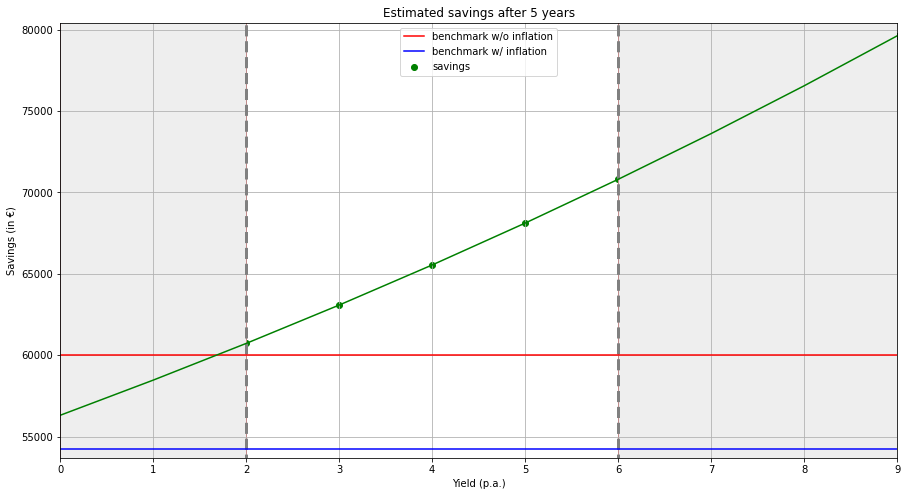

In [109]:
xaxis_len = np.arange(0,len(rate_pa))

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(np.array([2, 2]), [min(benchmark)*(0.9), max(savings)*1.1], 
         ls='--', color='gray', lw=3)
ax.plot(np.array([6, 6]), [min(benchmark)*(0.9), max(savings)*1.1], 
         ls='--', color='gray', lw=3)
rectl = Rectangle((0, 0), 2, max(savings)*2, linewidth=1, 
                 edgecolor='r', facecolor='#EEEEEE')
ax.add_patch(rectl)
rectr = Rectangle((6, 0), 10, max(savings)*2, linewidth=1, 
                 edgecolor='r', facecolor='#EEEEEE')
ax.add_patch(rectr)

ax.plot(np.array([seed_capital + rate_monthly*months]*len(rate_pa)), 
         label='benchmark w/o inflation', color='red')
ax.scatter(xaxis_len, savings, label='savings', color='green')
ax.plot(benchmark, color='blue', label='benchmark w/ inflation')
ax.plot(savings, color='green')

ax.set_ylim([min(benchmark)*0.99, max(savings)*1.01])
ax.set_xlim([0, 9])
ax.legend()
ax.grid()
ax.set_xticks(xaxis_len, minor=['{}%'.format(int(np.round(i, 0))) for i in rate*100])
ax.set_xlabel('Yield (p.a.)')
ax.set_ylabel('Savings (in €)')
ax.set_title(f'Estimated savings after {n_years} years');

# Estimate number of load payments

In [92]:
interest_rate = 0.01/12 # p.a.
payment_per_month = -115
loan_amount = 10000
n_payments = npf.nper(interest_rate, payment_per_month, loan_amount)

In [93]:
n_payments / 12 # will take about 7.5 years for Bafög to be paid

7.525475997838378

# Estimate monthly rate for loan payments

In [94]:
interest_rate = 0.02 / 12 # p.a.
mortgage_amount = 250_000
n_periods = 10*12 # to be paid in 10 years
m_payment = npf.pmt(interest_rate, n_periods, mortgage_amount)

In [95]:
m_payment # monthly rate

-2300.336346063969

# Estimate amount of interest in loay payments

In [96]:
periods = np.arange(10*12) + 1
interest_per_month = npf.ipmt(interest_rate, periods, n_periods, mortgage_amount)
interest_per_month[:10]

array([-416.66666667, -413.5272172 , -410.38253532, -407.2326123 ,
       -404.07743941, -400.9170079 , -397.751309  , -394.58033394,
       -391.40407392, -388.22252014])

Text(0, 0.5, 'Monthly interest payment')

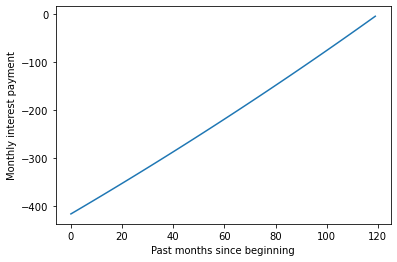

In [97]:
plt.plot(interest_per_month)
plt.xlabel('Past months since beginning')
plt.ylabel('Monthly interest payment')

# Estimate amount payment against loan

In [98]:
principal_per_month = npf.ppmt(interest_rate, periods, n_periods, mortgage_amount)
principal_per_month[0:10]

array([-1883.6696794 , -1886.80912886, -1889.95381074, -1893.10373376,
       -1896.25890665, -1899.41933816, -1902.58503706, -1905.75601212,
       -1908.93227214, -1912.11382593])

Text(0, 0.5, 'Payment Monthly')

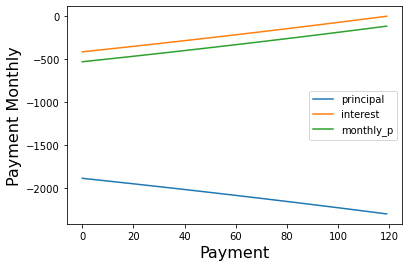

In [99]:
mortgage_df = pd.DataFrame({"principal": principal_per_month,
                           "interest": interest_per_month,
                           "monthly_p": interest_per_month + payment_per_month})
mortgage_df.plot()
plt.xlabel("Payment", size=16)
plt.ylabel("Payment Monthly", size=16)